
Accuracy: 0.55
F1-Score (weighted): 0.58
Recall (weighted): 0.55
Cohen's Kappa: 0.35
ROC-AUC: 0.77
Precision: 0.63
Recall: 0.55
Class 1: Precision = 0.66, Recall = 0.71, F1-Score = 0.68
Class 2: Precision = 0.33, Recall = 0.22, F1-Score = 0.26
Class 3: Precision = 0.76, Recall = 0.59, F1-Score = 0.66
Class 4: Precision = 0.02, Recall = 0.50, F1-Score = 0.04
Class 5: Precision = 0.22, Recall = 0.35, F1-Score = 0.27


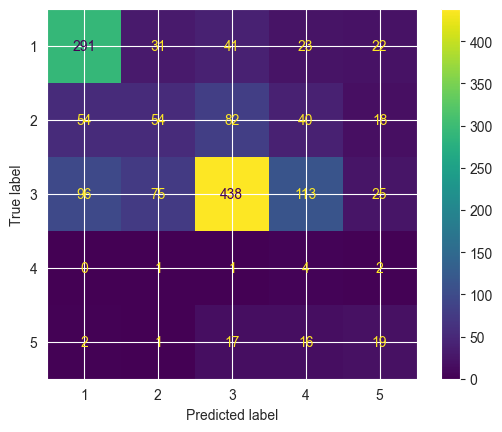

                    Feature  Importance
17         strike_rate_diff    0.052788
18            is_title_bout    0.050842
13       activity_rate_diff    0.049006
16  avg_fight_duration_diff    0.046698
14    str_success_rate_diff    0.041125
28          b_str_def_total    0.034818
30           b_td_def_total    0.034176
26           b_td_acc_total    0.033545
34                 b_td_avg    0.031930
7           SApM_total_diff    0.030877
29           r_td_def_total    0.030530
6           SLpM_total_diff    0.030422
27          r_str_def_total    0.030164
9         td_acc_total_diff    0.029963
4           wins_total_diff    0.029535
11             sub_avg_diff    0.029044
10        td_def_total_diff    0.028201
24      b_sig_str_acc_total    0.027310
15         recent_wins_diff    0.027259
23      r_sig_str_acc_total    0.027050
12                  td_diff    0.026677
32                b_sub_avg    0.026653
8    sig_str_acc_total_diff    0.026631
25           r_td_acc_total    0.026412


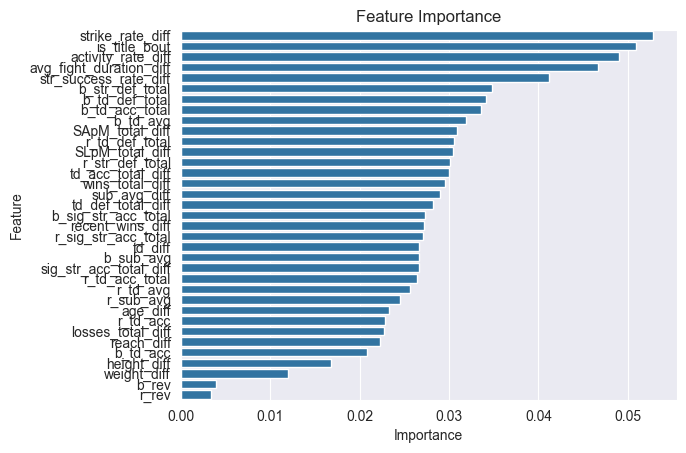


Predicted round for the fight: 4

Probability of each round:
Round 1: 16.32%
Round 2: 10.10%
Round 3: 8.78%
Round 4: 32.58%
Round 5: 32.22%

Detailed Classification Report for Prediction:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       408
           1       0.33      0.22      0.26       248
           2       0.76      0.59      0.66       747
           3       0.02      0.50      0.04         8
           4       0.22      0.35      0.27        55

    accuracy                           0.55      1466
   macro avg       0.40      0.47      0.38      1466
weighted avg       0.63      0.55      0.58      1466



In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score, roc_auc_score, precision_score, recall_score
from imblearn.ensemble import BalancedRandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
ufc_data = pd.read_csv('../data/processed/ufc_data_final.csv')

# 2. Ask the user to define if it's a title fight or not
is_title_bout_manual = int(input("Is this a title bout? Enter 1 for YES or 0 for NO: "))

# Data preparation
# Calculate feature differences
ufc_data['age_diff'] = ufc_data['r_age'] - ufc_data['b_age']
ufc_data['height_diff'] = ufc_data['r_height'] - ufc_data['b_height']
ufc_data['weight_diff'] = ufc_data['r_weight'] - ufc_data['b_weight']
ufc_data['reach_diff'] = ufc_data['r_reach'] - ufc_data['b_reach']
ufc_data['wins_total_diff'] = ufc_data['r_wins_total'] - ufc_data['b_wins_total']
ufc_data['losses_total_diff'] = ufc_data['r_losses_total'] - ufc_data['b_losses_total']
ufc_data['SLpM_total_diff'] = ufc_data['r_SLpM_total'] - ufc_data['b_SLpM_total']
ufc_data['SApM_total_diff'] = ufc_data['r_SApM_total'] - ufc_data['b_SApM_total']
ufc_data['sig_str_acc_total_diff'] = ufc_data['r_sig_str_acc_total'] - ufc_data['b_sig_str_acc_total']
ufc_data['td_acc_total_diff'] = ufc_data['r_td_acc_total'] - ufc_data['b_td_acc_total']
ufc_data['td_def_total_diff'] = ufc_data['r_td_def_total'] - ufc_data['b_td_def_total']
ufc_data['sub_avg_diff'] = ufc_data['r_sub_avg'] - ufc_data['b_sub_avg']
ufc_data['td_diff'] = ufc_data['r_td_avg'] - ufc_data['b_td_avg']

# Add new calculated features
ufc_data['r_activity_rate'] = ufc_data['r_str_att'] / ufc_data['time_sec']
ufc_data['b_activity_rate'] = ufc_data['b_str_att'] / ufc_data['time_sec']
ufc_data['activity_rate_diff'] = ufc_data['r_activity_rate'] - ufc_data['b_activity_rate']

ufc_data['r_str_success_rate'] = ufc_data['r_str'] / ufc_data['r_str_att']
ufc_data['b_str_success_rate'] = ufc_data['b_str'] / ufc_data['b_str_att']
ufc_data['str_success_rate_diff'] = ufc_data['r_str_success_rate'] - ufc_data['b_str_success_rate']

# Additional features
ufc_data['r_recent_wins'] = ufc_data['r_wins_total'] / (ufc_data['r_wins_total'] + ufc_data['r_losses_total'])
ufc_data['b_recent_wins'] = ufc_data['b_wins_total'] / (ufc_data['b_wins_total'] + ufc_data['b_losses_total'])
ufc_data['recent_wins_diff'] = ufc_data['r_recent_wins'] - ufc_data['b_recent_wins']

ufc_data['r_avg_fight_duration'] = ufc_data['r_ctrl_sec'] / ufc_data['r_wins_total']
ufc_data['b_avg_fight_duration'] = ufc_data['b_ctrl_sec'] / ufc_data['b_wins_total']
ufc_data['avg_fight_duration_diff'] = ufc_data['r_avg_fight_duration'] - ufc_data['b_avg_fight_duration']

ufc_data['r_strike_rate'] = ufc_data['r_sig_str'] / ufc_data['time_sec']
ufc_data['b_strike_rate'] = ufc_data['b_sig_str'] / ufc_data['time_sec']
ufc_data['strike_rate_diff'] = ufc_data['r_strike_rate'] - ufc_data['b_strike_rate']

# Adjust labels based on user input
ufc_data['adjusted_finish_round'] = ufc_data.apply(
    lambda row: row['finish_round'] if is_title_bout_manual == 1 else min(row['finish_round'], 3),
    axis=1
)

# Exclude features related to rounds 4 and 5 for non-title fights
if is_title_bout_manual == 0:
    ufc_data = ufc_data[ufc_data['adjusted_finish_round'] <= 3]
additional_features = [
    'r_rev', 'b_rev', 'r_td_acc', 'b_td_acc',
    'r_sig_str_acc_total', 'b_sig_str_acc_total',
    'r_td_acc_total', 'b_td_acc_total',
    'r_str_def_total', 'b_str_def_total',
    'r_td_def_total', 'b_td_def_total',
    'r_sub_avg', 'b_sub_avg', 'r_td_avg', 'b_td_avg'
]

# Define features and target
features = [
    'age_diff', 'height_diff', 'weight_diff', 'reach_diff',
    'wins_total_diff', 'losses_total_diff', 'SLpM_total_diff',
    'SApM_total_diff', 'sig_str_acc_total_diff', 'td_acc_total_diff',
    'td_def_total_diff', 'sub_avg_diff', 'td_diff',
    'activity_rate_diff', 'str_success_rate_diff', 'recent_wins_diff',
    'avg_fight_duration_diff', 'strike_rate_diff', 'is_title_bout'
] + additional_features

X = ufc_data[features]
y = ufc_data['adjusted_finish_round']

# Drop missing values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Align y with the filtered X
# Adjust labels for classification (start from 0)
y_adjusted = y - 1

# Normalize features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X.replace([np.inf, -np.inf], np.nan).dropna()), columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_adjusted, test_size=0.2, random_state=42, stratify=y_adjusted)

# 3. Train the Balanced Random Forest model
model = BalancedRandomForestClassifier(
    n_estimators=1000, max_depth=7 ,random_state=42, 
    sampling_strategy='auto', replacement=False, bootstrap=True
)
model.fit(X_train, y_train)

# 4. Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')


print(f"\nAccuracy: {accuracy:.2f}")
print(f"F1-Score (weighted): {f1:.2f}")
print(f"Recall (weighted): {recall:.2f}")
print(f"Cohen's Kappa: {kappa:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Detailed classification report
class_report = classification_report(y_test + 1, y_pred + 1, output_dict=True)
for class_label, metrics in class_report.items():
    if class_label not in ["accuracy", "macro avg", "weighted avg"]:
        print(f"Class {class_label}: Precision = {metrics['precision']:.2f}, Recall = {metrics['recall']:.2f}, F1-Score = {metrics['f1-score']:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test + 1, y_pred + 1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot()
plt.show()

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()

# Save results for a new prediction
# fighter_1 = "Khamzat Chimaev"
# fighter_2 = "Robert Whittaker"

# fighter_1 = "Islam Makhachev"
# fighter_2 = "Arman Tsarukyan"

fighter_1 = "Islam Makhachev"
fighter_2 = "Renato Moicano"

# fighter_1 = "Mackenzie Dern"
# fighter_2 = "Amanda Ribas"

# Check if fighters exist in the dataset
fighter_1_data = ufc_data[ufc_data['r_fighter'] == fighter_1]
fighter_2_data = ufc_data[ufc_data['b_fighter'] == fighter_2]

if fighter_1_data.empty:
    print(f"Error: Fighter '{fighter_1}' not found in the dataset.")
    exit()
if fighter_2_data.empty:
    print(f"Error: Fighter '{fighter_2}' not found in the dataset.")
    exit()

# Extract first occurrence of data
fighter_1_data = fighter_1_data.iloc[0]
fighter_2_data = fighter_2_data.iloc[0]

input_data = pd.DataFrame([{
    'age_diff': fighter_1_data['r_age'] - fighter_2_data['b_age'],
    'height_diff': fighter_1_data['r_height'] - fighter_2_data['b_height'],
    'weight_diff': fighter_1_data['r_weight'] - fighter_2_data['b_weight'],
    'reach_diff': fighter_1_data['r_reach'] - fighter_2_data['b_reach'],
    'wins_total_diff': fighter_1_data['r_wins_total'] - fighter_2_data['b_wins_total'],
    'losses_total_diff': fighter_1_data['r_losses_total'] - fighter_2_data['b_losses_total'],
    'SLpM_total_diff': fighter_1_data['r_SLpM_total'] - fighter_2_data['b_SLpM_total'],
    'SApM_total_diff': fighter_1_data['r_SApM_total'] - fighter_2_data['b_SApM_total'],
    'sig_str_acc_total_diff': fighter_1_data['r_sig_str_acc_total'] - fighter_2_data['b_sig_str_acc_total'],
    'td_acc_total_diff': fighter_1_data['r_td_acc_total'] - fighter_2_data['b_td_acc_total'],
    'td_def_total_diff': fighter_1_data['r_td_def_total'] - fighter_2_data['b_td_def_total'],
    'sub_avg_diff': fighter_1_data['r_sub_avg'] - fighter_2_data['b_sub_avg'],
    'td_diff': fighter_1_data['r_td_avg'] - fighter_2_data['b_td_avg'],
    'activity_rate_diff': fighter_1_data['r_activity_rate'] - fighter_2_data['b_activity_rate'],
    'str_success_rate_diff': fighter_1_data['r_str_success_rate'] - fighter_2_data['b_str_success_rate'],
    'recent_wins_diff': fighter_1_data['r_recent_wins'] - fighter_2_data['b_recent_wins'],
    'avg_fight_duration_diff': fighter_1_data['r_avg_fight_duration'] - fighter_2_data['b_avg_fight_duration'],
    'strike_rate_diff': fighter_1_data['r_strike_rate'] - fighter_2_data['b_strike_rate'],
    'rev_diff': fighter_1_data['r_rev'] - fighter_2_data['b_rev'],
    'td_acc_diff': fighter_1_data['r_td_acc'] - fighter_2_data['b_td_acc'],
    'sig_str_acc_diff': fighter_1_data['r_sig_str_acc_total'] - fighter_2_data['b_sig_str_acc_total'],
    'td_total_diff': fighter_1_data['r_td_acc_total'] - fighter_2_data['b_td_acc_total'],
    'str_def_diff': fighter_1_data['r_str_def_total'] - fighter_2_data['b_str_def_total'],
    'td_def_diff': fighter_1_data['r_td_def_total'] - fighter_2_data['b_td_def_total'],
    'td_avg_diff': fighter_1_data['r_td_avg'] - fighter_2_data['b_td_avg'],
    'is_title_bout': is_title_bout_manual
}])

# Ensure input_data columns match the training feature set
input_data = input_data.reindex(columns=X.columns)

# Convert to float to match training data type
input_data = input_data.astype(float)

# Normalize input data
input_data_scaled = pd.DataFrame(scaler.transform(input_data), columns=X.columns)

# Predict the round
predicted_round = model.predict(input_data_scaled) + 1
predicted_proba = model.predict_proba(input_data_scaled)

# Output predicted round and probabilities
print(f"\nPredicted round for the fight: {predicted_round[0]}")
print("\nProbability of each round:")
for i, prob in enumerate(predicted_proba[0], 1):
    print(f"Round {i}: {prob * 100:.2f}%")


f1_individual = classification_report(y_test, y_pred)


print("\nDetailed Classification Report for Prediction:")
print(f1_individual)



Accuracy: 0.69
F1-Score (weighted): 0.69
Recall (weighted): 0.69
Cohen's Kappa: 0.49
ROC-AUC: 0.82
Precision: 0.71
Recall: 0.69
Class 1: Precision = 0.67, Recall = 0.83, F1-Score = 0.74
Class 2: Precision = 0.37, Recall = 0.41, F1-Score = 0.39
Class 3: Precision = 0.83, Recall = 0.70, F1-Score = 0.76


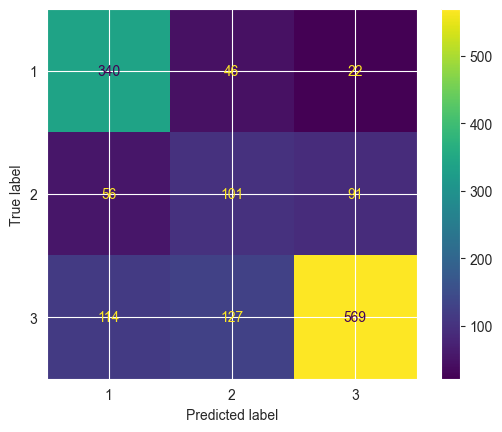

                    Feature  Importance
16  avg_fight_duration_diff    0.154211
22                 b_td_acc    0.096344
21                 r_td_acc    0.080900
13       activity_rate_diff    0.080890
14    str_success_rate_diff    0.071316
17         strike_rate_diff    0.046372
28          b_str_def_total    0.033553
30           b_td_def_total    0.026344
34                 b_td_avg    0.024858
27          r_str_def_total    0.023423
31                r_sub_avg    0.021848
12                  td_diff    0.021304
24      b_sig_str_acc_total    0.020832
11             sub_avg_diff    0.019227
26           b_td_acc_total    0.018586
29           r_td_def_total    0.018533
10        td_def_total_diff    0.017838
7           SApM_total_diff    0.017501
6           SLpM_total_diff    0.017414
33                 r_td_avg    0.017298
8    sig_str_acc_total_diff    0.015181
9         td_acc_total_diff    0.015106
15         recent_wins_diff    0.014884
23      r_sig_str_acc_total    0.013764


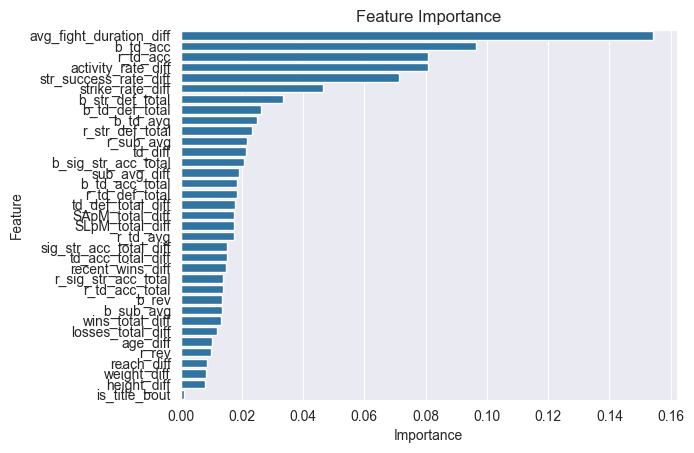

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score, roc_auc_score, precision_score, recall_score
from imblearn.ensemble import BalancedRandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
ufc_data = pd.read_csv('../data/processed/ufc_data_final.csv')

# 2. Ask the user to define if it's a title fight or not
# is_title_bout_manual = int(input("Is this a title bout? Enter 1 for YES or 0 for NO: "))

# Data preparation
# Calculate feature differences
ufc_data['age_diff'] = ufc_data['r_age'] - ufc_data['b_age']
ufc_data['height_diff'] = ufc_data['r_height'] - ufc_data['b_height']
ufc_data['weight_diff'] = ufc_data['r_weight'] - ufc_data['b_weight']
ufc_data['reach_diff'] = ufc_data['r_reach'] - ufc_data['b_reach']
ufc_data['wins_total_diff'] = ufc_data['r_wins_total'] - ufc_data['b_wins_total']
ufc_data['losses_total_diff'] = ufc_data['r_losses_total'] - ufc_data['b_losses_total']
ufc_data['SLpM_total_diff'] = ufc_data['r_SLpM_total'] - ufc_data['b_SLpM_total']
ufc_data['SApM_total_diff'] = ufc_data['r_SApM_total'] - ufc_data['b_SApM_total']
ufc_data['sig_str_acc_total_diff'] = ufc_data['r_sig_str_acc_total'] - ufc_data['b_sig_str_acc_total']
ufc_data['td_acc_total_diff'] = ufc_data['r_td_acc_total'] - ufc_data['b_td_acc_total']
ufc_data['td_def_total_diff'] = ufc_data['r_td_def_total'] - ufc_data['b_td_def_total']
ufc_data['sub_avg_diff'] = ufc_data['r_sub_avg'] - ufc_data['b_sub_avg']
ufc_data['td_diff'] = ufc_data['r_td_avg'] - ufc_data['b_td_avg']

# Add new calculated features
ufc_data['r_activity_rate'] = ufc_data['r_str_att'] / ufc_data['time_sec']
ufc_data['b_activity_rate'] = ufc_data['b_str_att'] / ufc_data['time_sec']
ufc_data['activity_rate_diff'] = ufc_data['r_activity_rate'] - ufc_data['b_activity_rate']

ufc_data['r_str_success_rate'] = ufc_data['r_str'] / ufc_data['r_str_att']
ufc_data['b_str_success_rate'] = ufc_data['b_str'] / ufc_data['b_str_att']
ufc_data['str_success_rate_diff'] = ufc_data['r_str_success_rate'] - ufc_data['b_str_success_rate']

# Additional features
ufc_data['r_recent_wins'] = ufc_data['r_wins_total'] / (ufc_data['r_wins_total'] + ufc_data['r_losses_total'])
ufc_data['b_recent_wins'] = ufc_data['b_wins_total'] / (ufc_data['b_wins_total'] + ufc_data['b_losses_total'])
ufc_data['recent_wins_diff'] = ufc_data['r_recent_wins'] - ufc_data['b_recent_wins']

ufc_data['r_avg_fight_duration'] = ufc_data['r_ctrl_sec'] / ufc_data['r_wins_total']
ufc_data['b_avg_fight_duration'] = ufc_data['b_ctrl_sec'] / ufc_data['b_wins_total']
ufc_data['avg_fight_duration_diff'] = ufc_data['r_avg_fight_duration'] - ufc_data['b_avg_fight_duration']

ufc_data['r_strike_rate'] = ufc_data['r_sig_str'] / ufc_data['time_sec']
ufc_data['b_strike_rate'] = ufc_data['b_sig_str'] / ufc_data['time_sec']
ufc_data['strike_rate_diff'] = ufc_data['r_strike_rate'] - ufc_data['b_strike_rate']

# Adjust labels based on user input
ufc_data['adjusted_finish_round'] = ufc_data.apply(
    lambda row: row['finish_round'] if is_title_bout_manual == 1 else min(row['finish_round'], 3),
    axis=1
)

# Exclude features related to rounds 4 and 5 for non-title fights
if is_title_bout_manual == 0:
    ufc_data = ufc_data[ufc_data['adjusted_finish_round'] <= 3]
additional_features = [
    'r_rev', 'b_rev', 'r_td_acc', 'b_td_acc',
    'r_sig_str_acc_total', 'b_sig_str_acc_total',
    'r_td_acc_total', 'b_td_acc_total',
    'r_str_def_total', 'b_str_def_total',
    'r_td_def_total', 'b_td_def_total',
    'r_sub_avg', 'b_sub_avg', 'r_td_avg', 'b_td_avg'
]

# Define features and target
features = [
    'age_diff', 'height_diff', 'weight_diff', 'reach_diff',
    'wins_total_diff', 'losses_total_diff', 'SLpM_total_diff',
    'SApM_total_diff', 'sig_str_acc_total_diff', 'td_acc_total_diff',
    'td_def_total_diff', 'sub_avg_diff', 'td_diff',
    'activity_rate_diff', 'str_success_rate_diff', 'recent_wins_diff',
    'avg_fight_duration_diff', 'strike_rate_diff','is_title_bout'

] + additional_features

X = ufc_data[features]
y = ufc_data['adjusted_finish_round']

# Drop missing values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Align y with the filtered X
# Adjust labels for classification (start from 0)
y_adjusted = y - 1

# Normalize features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X.replace([np.inf, -np.inf], np.nan).dropna()), columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_adjusted, test_size=0.2, random_state=42, stratify=y_adjusted)

# 3. Train the Balanced Random Forest model
model = BalancedRandomForestClassifier(
    n_estimators=1000, max_depth=7 ,random_state=42, 
    sampling_strategy='auto', replacement=False, bootstrap=True
)
model.fit(X_train, y_train)

# 4. Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"F1-Score (weighted): {f1:.2f}")
print(f"Recall (weighted): {recall:.2f}")
print(f"Cohen's Kappa: {kappa:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Detailed classification report
class_report = classification_report(y_test + 1, y_pred + 1, output_dict=True)
for class_label, metrics in class_report.items():
    if class_label not in ["accuracy", "macro avg", "weighted avg"]:
        print(f"Class {class_label}: Precision = {metrics['precision']:.2f}, Recall = {metrics['recall']:.2f}, F1-Score = {metrics['f1-score']:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test + 1, y_pred + 1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot()
plt.show()

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()


In [114]:
import joblib

def save_trained_model(model, save_path):
    """
    Функция для сохранения обученной модели в файл.
    
    Parameters:
    model: объект модели (например, BalancedRandomForestClassifier)
    save_path: путь для сохранения модели
    """
    joblib.dump(model, save_path)
    print(f"Model saved to {save_path}")

# Пример вызова после обучения модели
model_save_path = '../models/balanced_rf_model_new.pkl'
save_trained_model(model, model_save_path)


Model saved to ../models/balanced_rf_model_new.pkl


In [3]:
# Save results for a new prediction
# fighter_1 = "Khamzat Chimaev"
# fighter_2 = "Robert Whittaker"

fighter_1 = "Karol Rosa"
fighter_2 = "Ailin Perez"

# fighter_1 = "Santiago Ponzinibbio"
# fighter_2 = "Carlston Harris"

# fighter_1 = "Mackenzie Dern"
# fighter_2 = "Amanda Ribas"

# Check if fighters exist in the dataset
fighter_1_data = ufc_data[ufc_data['r_fighter'] == fighter_1]
fighter_2_data = ufc_data[ufc_data['b_fighter'] == fighter_2]

if fighter_1_data.empty:
    print(f"Error: Fighter '{fighter_1}' not found in the dataset.")
    exit()
if fighter_2_data.empty:
    print(f"Error: Fighter '{fighter_2}' not found in the dataset.")
    exit()

# Extract first occurrence of data
fighter_1_data = fighter_1_data.iloc[0]
fighter_2_data = fighter_2_data.iloc[0]

input_data = pd.DataFrame([{
    'age_diff': fighter_1_data['r_age'] - fighter_2_data['b_age'],
    'height_diff': fighter_1_data['r_height'] - fighter_2_data['b_height'],
    'weight_diff': fighter_1_data['r_weight'] - fighter_2_data['b_weight'],
    'reach_diff': fighter_1_data['r_reach'] - fighter_2_data['b_reach'],
    'wins_total_diff': fighter_1_data['r_wins_total'] - fighter_2_data['b_wins_total'],
    'losses_total_diff': fighter_1_data['r_losses_total'] - fighter_2_data['b_losses_total'],
    'SLpM_total_diff': fighter_1_data['r_SLpM_total'] - fighter_2_data['b_SLpM_total'],
    'SApM_total_diff': fighter_1_data['r_SApM_total'] - fighter_2_data['b_SApM_total'],
    'sig_str_acc_total_diff': fighter_1_data['r_sig_str_acc_total'] - fighter_2_data['b_sig_str_acc_total'],
    'td_acc_total_diff': fighter_1_data['r_td_acc_total'] - fighter_2_data['b_td_acc_total'],
    'td_def_total_diff': fighter_1_data['r_td_def_total'] - fighter_2_data['b_td_def_total'],
    'sub_avg_diff': fighter_1_data['r_sub_avg'] - fighter_2_data['b_sub_avg'],
    'td_diff': fighter_1_data['r_td_avg'] - fighter_2_data['b_td_avg'],
    'activity_rate_diff': fighter_1_data['r_activity_rate'] - fighter_2_data['b_activity_rate'],
    'str_success_rate_diff': fighter_1_data['r_str_success_rate'] - fighter_2_data['b_str_success_rate'],
    'recent_wins_diff': fighter_1_data['r_recent_wins'] - fighter_2_data['b_recent_wins'],
    'avg_fight_duration_diff': fighter_1_data['r_avg_fight_duration'] - fighter_2_data['b_avg_fight_duration'],
    'strike_rate_diff': fighter_1_data['r_strike_rate'] - fighter_2_data['b_strike_rate'],
    'rev_diff': fighter_1_data['r_rev'] - fighter_2_data['b_rev'],
    'td_acc_diff': fighter_1_data['r_td_acc'] - fighter_2_data['b_td_acc'],
    'sig_str_acc_diff': fighter_1_data['r_sig_str_acc_total'] - fighter_2_data['b_sig_str_acc_total'],
    'td_total_diff': fighter_1_data['r_td_acc_total'] - fighter_2_data['b_td_acc_total'],
    'str_def_diff': fighter_1_data['r_str_def_total'] - fighter_2_data['b_str_def_total'],
    'td_def_diff': fighter_1_data['r_td_def_total'] - fighter_2_data['b_td_def_total'],
    'td_avg_diff': fighter_1_data['r_td_avg'] - fighter_2_data['b_td_avg'],
    'is_title_bout': is_title_bout_manual
}])

# Ensure input_data columns match the training feature set
input_data = input_data.reindex(columns=X.columns)

# Convert to float to match training data type
input_data = input_data.astype(float)

# Normalize input data
input_data_scaled = pd.DataFrame(scaler.transform(input_data), columns=X.columns)

# Predict the round
predicted_round = model.predict(input_data_scaled) + 1
predicted_proba = model.predict_proba(input_data_scaled)

# Output predicted round and probabilities
print(f"\nPredicted round for the fight: {predicted_round[0]}")
print("\nProbability of each round:")
for i, prob in enumerate(predicted_proba[0], 1):
    print(f"Round {i}: {prob * 100:.2f}%")


f1_individual = classification_report(y_test, y_pred)


print("\nDetailed Classification Report for Prediction:")
print(f1_individual)



Predicted round for the fight: 1

Probability of each round:
Round 1: 36.38%
Round 2: 27.86%
Round 3: 35.76%

Detailed Classification Report for Prediction:
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       408
           1       0.37      0.41      0.39       248
           2       0.83      0.70      0.76       810

    accuracy                           0.69      1466
   macro avg       0.62      0.65      0.63      1466
weighted avg       0.71      0.69      0.69      1466



In [8]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def predict_fight_outcome(model_path, dataset_path, fighter1_name, fighter2_name, is_title_bout):
    # Загрузка модели
    try:
        model = joblib.load(model_path)
        print(f"Model loaded from {model_path}")
    except FileNotFoundError:
        print("Error: Model file not found.")
        return

    # Загрузка датасета
    try:
        dataset = pd.read_csv(dataset_path)
        print(f"Dataset loaded from {dataset_path}")
    except FileNotFoundError:
        print("Error: Dataset file not found.")
        return

    # Поиск данных бойцов
    fighter1_data = dataset[dataset['r_fighter'] == fighter1_name]
    fighter2_data = dataset[dataset['b_fighter'] == fighter2_name]

    if fighter1_data.empty:
        print(f"Error: Fighter '{fighter1_name}' not found in dataset.")
        return

    if fighter2_data.empty:
        print(f"Error: Fighter '{fighter2_name}' not found in dataset.")
        return

    # Используем первую запись для каждого бойца
    fighter1_data = fighter1_data.iloc[0]
    fighter2_data = fighter2_data.iloc[0]

    # Подготовка признаков
    input_features = {
        'age_diff': fighter1_data['r_age'] - fighter2_data['b_age'],
        'height_diff': fighter1_data['r_height'] - fighter2_data['b_height'],
        'weight_diff': fighter1_data['r_weight'] - fighter2_data['b_weight'],
        'reach_diff': fighter1_data['r_reach'] - fighter2_data['b_reach'],
        'wins_total_diff': fighter1_data['r_wins_total'] - fighter2_data['b_wins_total'],
        'losses_total_diff': fighter1_data['r_losses_total'] - fighter2_data['b_losses_total'],
        'SLpM_total_diff': fighter1_data['r_SLpM_total'] - fighter2_data['b_SLpM_total'],
        'SApM_total_diff': fighter1_data['r_SApM_total'] - fighter2_data['b_SApM_total'],
        'sig_str_acc_total_diff': fighter1_data['r_sig_str_acc_total'] - fighter2_data['b_sig_str_acc_total'],
        'td_acc_total_diff': fighter1_data['r_td_acc_total'] - fighter2_data['b_td_acc_total'],
        'td_def_total_diff': fighter1_data['r_td_def_total'] - fighter2_data['b_td_def_total'],
        'sub_avg_diff': fighter1_data['r_sub_avg'] - fighter2_data['b_sub_avg'],
        'td_diff': fighter1_data['r_td_avg'] - fighter2_data['b_td_avg'],
        'activity_rate_diff': fighter1_data.get('r_activity_rate', 0) - fighter2_data.get('b_activity_rate', 0),
        'str_success_rate_diff': fighter1_data.get('r_str_success_rate', 0) - fighter2_data.get('b_str_success_rate', 0),
        'recent_wins_diff': fighter1_data.get('r_recent_wins', 0) - fighter2_data.get('b_recent_wins', 0),
        'avg_fight_duration_diff': fighter1_data.get('r_avg_fight_duration', 0) - fighter2_data.get('b_avg_fight_duration', 0),
        'strike_rate_diff': fighter1_data.get('r_strike_rate', 0) - fighter2_data.get('b_strike_rate', 0),
        'is_title_bout': int(is_title_bout),
        'r_rev': fighter1_data.get('r_rev', 0),
        'b_rev': fighter2_data.get('b_rev', 0),
        'r_td_acc': fighter1_data.get('r_td_acc', 0),
        'b_td_acc': fighter2_data.get('b_td_acc', 0),
        'r_sig_str_acc_total': fighter1_data.get('r_sig_str_acc_total', 0),
        'b_sig_str_acc_total': fighter2_data.get('b_sig_str_acc_total', 0),
        'r_td_acc_total': fighter1_data.get('r_td_acc_total', 0),
        'b_td_acc_total': fighter2_data.get('b_td_acc_total', 0),
        'r_str_def_total': fighter1_data.get('r_str_def_total', 0),
        'b_str_def_total': fighter2_data.get('b_str_def_total', 0),
        'r_td_def_total': fighter1_data.get('r_td_def_total', 0),
        'b_td_def_total': fighter2_data.get('b_td_def_total', 0),
        'r_sub_avg': fighter1_data.get('r_sub_avg', 0),
        'b_sub_avg': fighter2_data.get('b_sub_avg', 0),
        'r_td_avg': fighter1_data.get('r_td_avg', 0),
        'b_td_avg': fighter2_data.get('b_td_avg', 0)
    }

    # Конвертация в DataFrame для предсказания
    input_data = pd.DataFrame([input_features])

    # Предсказание
    try:
        predicted_round = model.predict(input_data)[0] + 1
        predicted_proba = model.predict_proba(input_data)[0]

        # Обрезка вероятностей для 3 или 5 раундов
        max_rounds = 5 if is_title_bout else 3
        probabilities = {f"Round {i+1}": prob for i, prob in enumerate(predicted_proba[:max_rounds])}

    except Exception as e:
        print(f"Error during prediction: {e}")
        return

    # Форматирование результатов
    result = {
        "fighters": f"{fighter1_name} vs {fighter2_name}",
        "predicted_round": predicted_round,
        "probabilities": probabilities
    }

    # Красивый вывод результатов
    print(f"\nPrediction Result:")
    print(f"Fight: {fighter1_name} vs {fighter2_name}")
    print(f"Predicted round: {predicted_round}")
    print("Probabilities for each round:")
    for round_num, prob in probabilities.items():
        print(f"  {round_num}: {prob:.2%}")

    return result

# Пример использования
if __name__ == "__main__":
    model_path = '../models/balanced_rf_model_new.pkl'
    dataset_path = '../data/processed/ufc_data_final.csv'

    fighter1_name = input("Enter the name of Fighter 1: ")
    fighter2_name = input("Enter the name of Fighter 2: ")
    is_title_bout = bool(int(input("Is this a title bout? Enter 1 for YES or 0 for NO: ")))

    result = predict_fight_outcome(model_path, dataset_path, fighter1_name, fighter2_name, is_title_bout)


Model loaded from ../models/balanced_rf_model_new.pkl
Dataset loaded from ../data/processed/ufc_data_final.csv

Prediction Result:
Fight: Grant Dawson vs Diego Ferreira
Predicted round: 1
Probabilities for each round:
  Round 1: 26.99%
  Round 2: 26.07%
  Round 3: 22.44%


In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score, roc_auc_score, precision_score, recall_score
from imblearn.ensemble import BalancedRandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Параметры для Grid Search ===
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 10],
    'sampling_strategy': ['auto', {0: 500, 1: 500, 2: 500}],  # Стратегия ресэмплинга
    'bootstrap': [True, False],
    'replacement': [True, False]
}

# === 2. Загрузка данных ===
ufc_data = pd.read_csv('../data/processed/ufc_data_final.csv')

is_title_bout_manual = int(input("Is this a title bout? Enter 1 for YES or 0 for NO: "))

# === 3. Подготовка данных ===
ufc_data['age_diff'] = ufc_data['r_age'] - ufc_data['b_age']
ufc_data['height_diff'] = ufc_data['r_height'] - ufc_data['b_height']
ufc_data['weight_diff'] = ufc_data['r_weight'] - ufc_data['b_weight']
ufc_data['reach_diff'] = ufc_data['r_reach'] - ufc_data['b_reach']
ufc_data['wins_total_diff'] = ufc_data['r_wins_total'] - ufc_data['b_wins_total']
ufc_data['losses_total_diff'] = ufc_data['r_losses_total'] - ufc_data['b_losses_total']

ufc_data['adjusted_finish_round'] = ufc_data.apply(
    lambda row: row['finish_round'] if is_title_bout_manual == 1 else min(row['finish_round'], 3),
    axis=1
)
if is_title_bout_manual == 0:
    ufc_data = ufc_data[ufc_data['adjusted_finish_round'] <= 3]

features = ['age_diff', 'height_diff', 'weight_diff', 'reach_diff', 'wins_total_diff', 'losses_total_diff']
X = ufc_data[features]
y = ufc_data['adjusted_finish_round']

X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y - 1, test_size=0.2, random_state=42, stratify=y - 1)

# === 4. Grid Search ===
print("Starting Grid Search...")
base_model = BalancedRandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=2,
    n_jobs=-1,
    error_score='raise'
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# === 5. Оценка ===
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)

print("\nBest Model Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")
print(f"F1-Score (weighted): {f1_score(y_test, y_pred_best, average='weighted'):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_best, multi_class='ovr'):.2f}")

cm_best = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(confusion_matrix=cm_best).plot()
plt.title("Confusion Matrix - Best Model")
plt.show()

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importances)
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()


KeyboardInterrupt: Interrupted by user